# CNN

In [86]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from src.util import load_star_galaxy_dataset as load_dataset

In [87]:
sg = load_dataset()
print(sg.DESCR)

X_train, X_test, y_train, y_test = train_test_split(sg.image / 255.0, sg.target)

This is a simple dataset consisting of ~3000 64x64 images of stars and ~1000 images of galaxies. The images were captured by the in-house 1.3m telescope of the observatory situated in Devasthal, Nainital, India.


In [88]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [89]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [90]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [91]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 9216)             

In [92]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test, y_test),
)

Epoch 1/10
94/94 [==============================] - 19s 195ms/step - loss: 0.6391 - accuracy: 0.7571 - val_loss: 0.5642 - val_accuracy: 0.7583
Epoch 2/10
94/94 [==============================] - 16s 171ms/step - loss: 0.5462 - accuracy: 0.7655 - val_loss: 0.5407 - val_accuracy: 0.7583
Epoch 3/10
94/94 [==============================] - 18s 187ms/step - loss: 0.5117 - accuracy: 0.7655 - val_loss: 0.4362 - val_accuracy: 0.7944
Epoch 4/10
94/94 [==============================] - 17s 178ms/step - loss: 0.4476 - accuracy: 0.7845 - val_loss: 0.4503 - val_accuracy: 0.7573
Epoch 5/10
94/94 [==============================] - 16s 172ms/step - loss: 0.3705 - accuracy: 0.8347 - val_loss: 0.3389 - val_accuracy: 0.8566
Epoch 6/10
94/94 [==============================] - 16s 169ms/step - loss: 0.3278 - accuracy: 0.8548 - val_loss: 0.3040 - val_accuracy: 0.8806
Epoch 7/10
94/94 [==============================] - 16s 168ms/step - loss: 0.3017 - accuracy: 0.8709 - val_loss: 0.2994 - val_accuracy: 0.8897

94/94 - 3s - loss: 0.2761 - accuracy: 0.9013 - 3s/epoch - 33ms/step
32/32 - 1s - loss: 0.3177 - accuracy: 0.8746 - 1s/epoch - 33ms/step


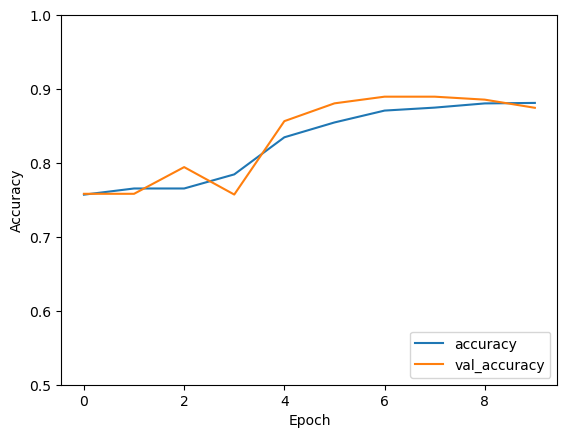

In [97]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [94]:
print(test_acc)

0.8746238946914673


In [95]:
test_loss, test_acc = model.evaluate(
    np.asarray([X_test[i] for i in range(len(X_test)) if sg.target_names[y_test[i]] == "galaxy"]),
    np.asarray([y_test[i] for i in range(len(y_test)) if sg.target_names[y_test[i]] == "galaxy"]),
    verbose=2,
)

print(test_acc)

8/8 - 0s - loss: 0.5464 - accuracy: 0.8008 - 273ms/epoch - 34ms/step
0.8008298873901367


In [96]:
test_loss, test_acc = model.evaluate(
    np.asarray([X_test[i] for i in range(len(X_test)) if sg.target_names[y_test[i]] == "star"]),
    np.asarray([y_test[i] for i in range(len(y_test)) if sg.target_names[y_test[i]] == "star"]),
    verbose=2,
)

print(test_acc)

24/24 - 1s - loss: 0.2448 - accuracy: 0.8981 - 648ms/epoch - 27ms/step
0.8981481194496155
